In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
dataset=pd.read_csv(r"D:\Different Data\Machine Learning\Angrew\Linear Regression\Polynomial regresssion\Position_Salaries.csv")
dataset.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [33]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [34]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [35]:
dataset.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [36]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

<Axes: xlabel='Position', ylabel='Salary'>

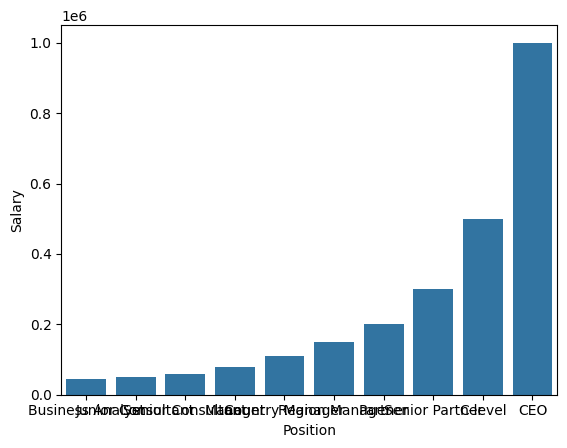

In [37]:
sns.barplot(x="Position",y="Salary",data=dataset)

<Axes: xlabel='Level', ylabel='Salary'>

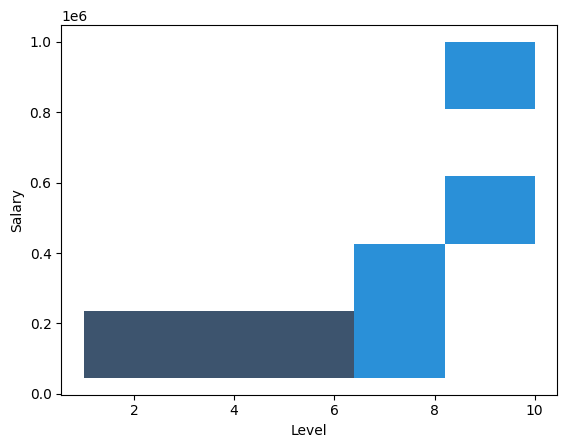

In [38]:
sns.histplot(x="Level",y="Salary",data=dataset)

<Axes: xlabel='Position', ylabel='Level'>

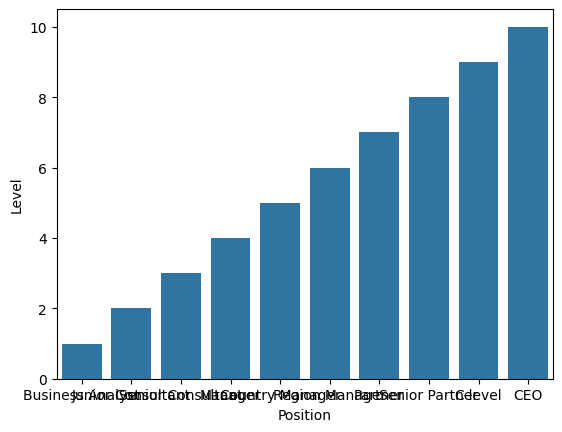

In [39]:
sns.barplot(x="Position",y="Level",data=dataset)

In [43]:
from sklearn.model_selection import train_test_split

x = dataset['Level']
y = dataset['Salary']

In [47]:

x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()



In [50]:
model.fit(x,y)

LinearRegression()

In [56]:
# Coefficients (m values)
print("Coefficients (m values):", model.coef_)

# Intercept (b value)
print("Intercept (b value):", model.intercept_)


Coefficients (m values): [[80878.78787879]]
Intercept (b value): [-195333.33333333]


In [57]:
x1=6.5
m=round((model.coef_[0][0])*x1+(model.intercept_[0]))

print("The Salary of {} is {}".format(x1,y))                    


The Salary of 6.5 is [[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [59]:
pred=model.predict(x)
pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [60]:
dataset["Pred Salary"]=pred
dataset

,Position,Level,Salary,Pred Salary
0,Business Analyst,1,45000,-114454.545455
1,Junior Consultant,2,50000,-33575.757576
2,Senior Consultant,3,60000,47303.030303
3,Manager,4,80000,128181.818182
4,Country Manager,5,110000,209060.606061
5,Region Manager,6,150000,289939.393939
6,Partner,7,200000,370818.181818
7,Senior Partner,8,300000,451696.969697
8,C-level,9,500000,532575.757576
9,CEO,10,1000000,613454.545455


In [61]:
dataset["Variation"]=dataset["Salary"]-dataset["Pred Salary"]
dataset

,Position,Level,Salary,Pred Salary,Variation
0,Business Analyst,1,45000,-114454.545455,159454.545455
1,Junior Consultant,2,50000,-33575.757576,83575.757576
2,Senior Consultant,3,60000,47303.030303,12696.969697
3,Manager,4,80000,128181.818182,-48181.818182
4,Country Manager,5,110000,209060.606061,-99060.606061
5,Region Manager,6,150000,289939.393939,-139939.393939
6,Partner,7,200000,370818.181818,-170818.181818
7,Senior Partner,8,300000,451696.969697,-151696.969697
8,C-level,9,500000,532575.757576,-32575.757576
9,CEO,10,1000000,613454.545455,386545.454545


In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [67]:
mean_squared_error(dataset["Salary"],dataset["Pred Salary"])

26695878787.878784

In [68]:
mean_absolute_error(dataset["Salary"],dataset["Pred Salary"])

128454.54545454546

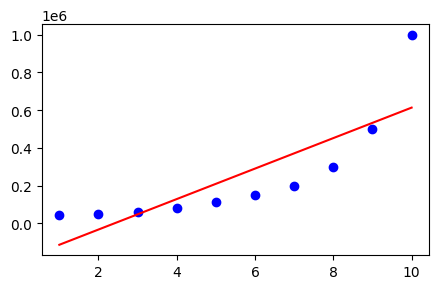

In [70]:
plt.figure(figsize=(5,3))
plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color = 'red')
plt.show()


Apply Polynomial Regression Model

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
poly=PolynomialFeatures(degree=4)


In [75]:
x_1=poly.fit_transform(x)
x_1

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [76]:
poly.fit(x_1,y)

PolynomialFeatures(degree=4)

In [77]:
model1=LinearRegression()

In [78]:
model1.fit(x_1,y)

LinearRegression()

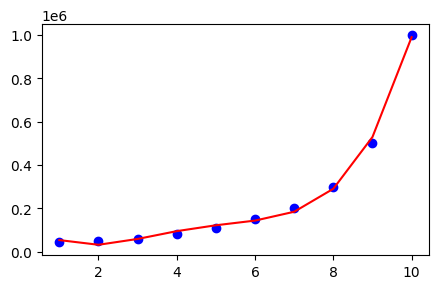

In [81]:
plt.figure(figsize=(5,3))
plt.scatter(x,y,color='blue')
plt.plot(x,model1.predict(x_1),color = 'red')
plt.show()

In [82]:
mean_squared_error(y, model1.predict(x_1))

210343822.84381685

In [83]:
mean_absolute_error(y, model1.predict(x_1))

12681.818181828514

### Comparison of Linear Regression and Polynomial Regression Models for Salary Prediction

In the dataset **Position_Salaries**, the goal was to predict the salaries of employees using two regression models: **Linear Regression** and **Polynomial Regression**. The performance metrics for both models are compared as follows:

- **Linear Regression Model:**
  - **Accuracy (R²):** 66.9%
  - **Mean Squared Error (MSE):** 26,695,878,787.88
  - **Mean Absolute Error (MAE):** 128,454.55

- **Polynomial Regression Model:**
  - **Accuracy (R²):** 99.74%
  - **Mean Squared Error (MSE):** 210,343,822.84
  - **Mean Absolute Error (MAE):** 12,681.82

From the comparison, it is evident that the **Polynomial Regression** model significantly outperforms the **Linear Regression** model in terms of both accuracy and error metrics. The Polynomial Regression model achieves an R² score of **99.74%**, indicating that it explains nearly all the variance in the salary data, while the Linear Regression model explains only **66.9%** of the variance.

Additionally, the **MSE** and **MAE** values are considerably lower for the Polynomial Regression model, indicating that it provides more accurate salary predictions with reduced errors. 

Thus, based on these performance metrics, the **Polynomial Regression** model proves to be a more efficient and effective model for predicting employee salaries in this dataset.
